# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


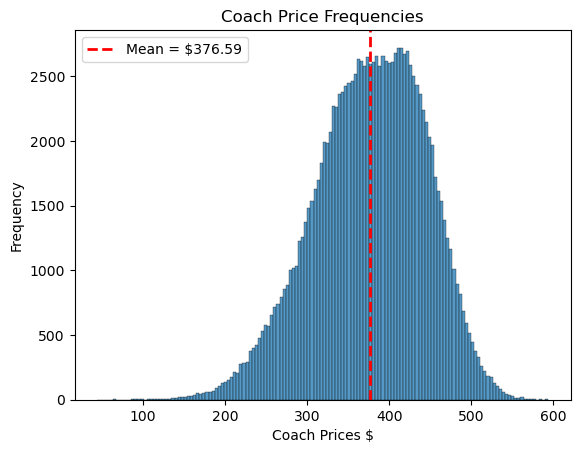

The cheapest coach ticket is $44.41 and the most expensive coach ticket is $593.63.
A coach ticket for $500 is high, since the average cost of a coach ticket is $376.59 and the majority of tickets sold cost around $400.


<Figure size 640x480 with 0 Axes>

In [89]:
## Task 1
mean = np.mean(flight['coach_price'])
sns.histplot(flight['coach_price'], edgecolor='black')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean = ${mean:.2f}')
plt.title('Coach Price Frequencies')
plt.xlabel('Coach Prices $')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.clf()
print('The cheapest coach ticket is $' + str(round(flight['coach_price'].min(), 2)) + ' and the most expensive coach ticket is $' +\
     str(round(flight['coach_price'].max(), 2)) + '.')
print('A coach ticket for $500 is high, since the average cost of a coach ticket is $376.59 and the majority of tickets sold cost around $400.')

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

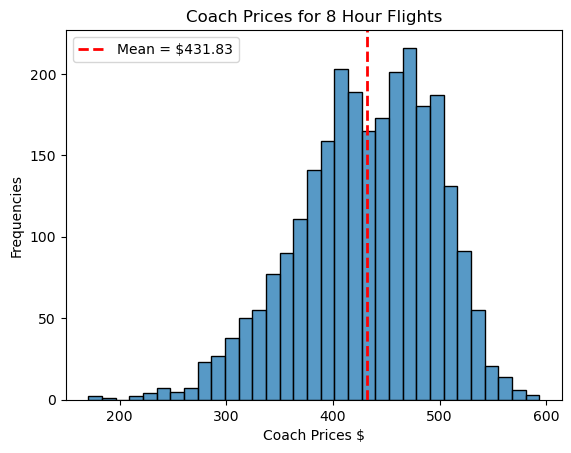

The cheapest coach ticket for an 8-hour flight is $170.77 and the most expensive coach ticket for an 8-hour flight is $593.63.
A coach ticket for $500 for an 8-hour flight seems more reasonable since the average price of a ticket for an 8-hour flight is $431.83.
However, the majority of tickets sold was less than $500.


<Figure size 640x480 with 0 Axes>

In [83]:
## Task 2
mean_8hour = np.mean(flight[flight['hours'] == 8]['coach_price'])
coach_price_8hour = flight[flight['hours'] == 8]['coach_price']
sns.histplot(coach_price_8hour, edgecolor='black')
plt.axvline(mean_8hour, color='red', linestyle='dashed', linewidth=2, label=f'Mean = ${mean_8hour:.2f}')
plt.title('Coach Prices for 8 Hour Flights')
plt.xlabel('Coach Prices $')
plt.ylabel('Frequencies')
plt.legend()
plt.show()
plt.clf()
print('The cheapest coach ticket for an 8-hour flight is $' + str(round(coach_price_8hour.min(), 2)) + \
      ' and the most expensive coach ticket for an 8-hour flight is $' + str(round(coach_price_8hour.max(), 2)) + '.')
print('A coach ticket for $500 for an 8-hour flight seems more reasonable since the average price of a ticket for an 8-hour flight is $431.83.'
      '\nHowever, the majority of tickets sold was less than $500.')

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

delay
0       10139
1           4
2          31
3          66
4         275
5         912
6        2632
7        6189
8       11797
9       16909
10      18997
11      17096
12      11853
13       6759
14       3101
15       1534
16        838
17        768
18        797
19        852
20       1031
21       1025
22       1050
23       1166
24       1148
25       1132
26       1212
27       1157
28       1143
29       1039
30       1036
31        919
32        854
33        705
34        624
35        559
36        461
37        409
38        324
39        265
40        210
41        163
42        125
43         98
44         77
45         59
46         45
47         35
48         21
49         11
50         13
51          4
52          2
53          4
54          4
58          1
1446        2
1459        1
1462        2
1467        2
1468        2
1469        1
1472        1
1473        1
1475        1
1476        1
1477        1
1479        2
1480        1
1481        1
1482        1


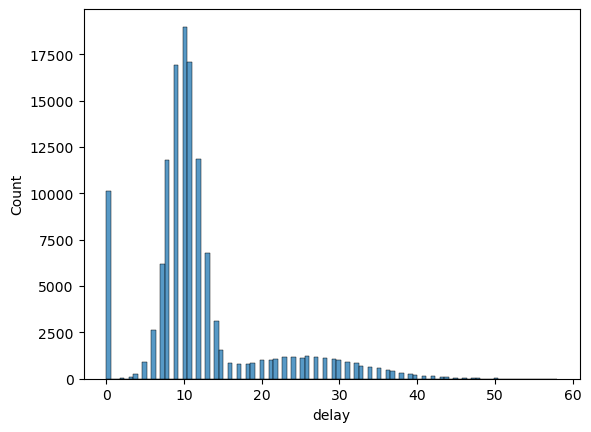

The delay times range from 0 minutes to 1560 minutes. Because of this large range, we need to zoom in on our histogram. There appears to be outliers ranging from 1446 minutes to 1560 minutes. Looking at delay times less than 1400 minutes we can see that the majority of delays are around 10 minutes long. The average delay time for this segment is 12.02 minutes.


<Figure size 640x480 with 0 Axes>

In [149]:
## Task 3
# Determine the frequency of unique delay times
pd.set_option('display.max_rows', None)
print(flight['delay'].value_counts().sort_index())

delay_mean = np.mean(flight[flight['delay']<500]['delay'])
print(flight['delay'].min(), flight['delay'].max())
sns.histplot(flight[flight['delay']<1400]['delay'], edgecolor='black', bins = 100)
plt.show()
plt.clf()
print('The delay times range from 0 minutes to 1560 minutes. Because of this large range, we need to zoom in on our histogram. '
      'There appears to be outliers ranging from 1446 minutes to 1560 minutes. '
      'Looking at delay times less than 1400 minutes we can see that the majority of delays are around 10 minutes long. '
      'The average delay time for this segment is ' + str(round(delay_mean, 2)) + ' minutes.')

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

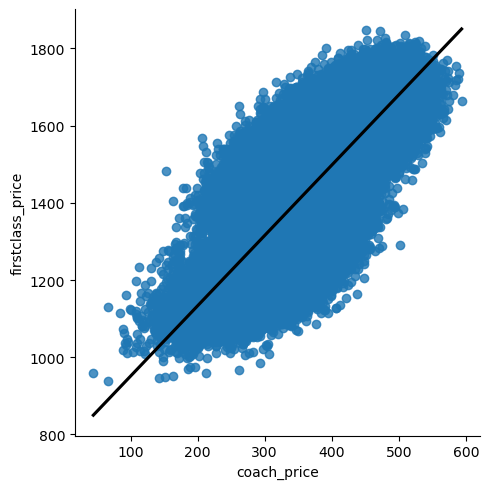

A correlation of 0.7587565939365974 indicates a strong, positive linear relationship between coach prices and first class prices


<Figure size 640x480 with 0 Axes>

In [273]:
## Task 4
from scipy.stats import pearsonr
sns.lmplot(x = 'coach_price', y = 'firstclass_price', data=flight, line_kws={'color':'black'})
plt.show()
plt.clf()
corr_coach_firstclass, p = pearsonr(flight.coach_price, flight.firstclass_price)
print('A correlation of ' + str(corr_coach_firstclass) + ' indicates a strong, positive linear relationship between coach prices and first class prices')

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

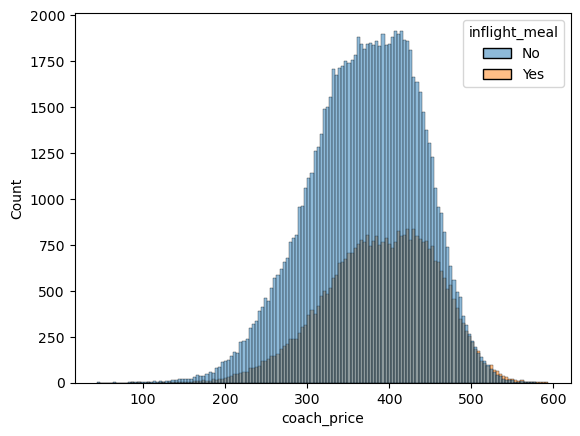

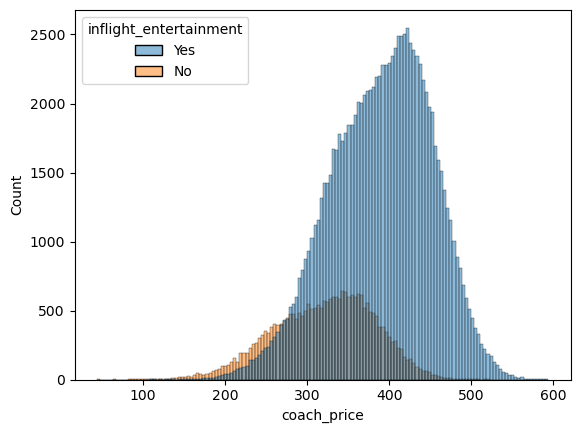

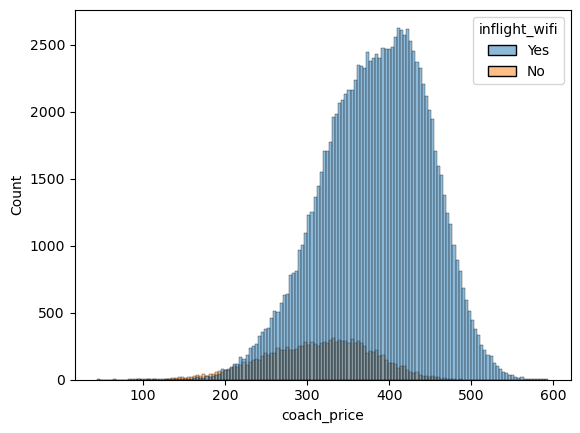

It appears that the cost of a flight with an inflight meal is similar to the cost of a flight without an inflight meal. 
The cost of a flight with inflight entertainment and the cost of a flight with wifi is higher than the cost of a flight without those features. 
However, there are more flights with inflight entertainment and wifi than there are with a meal.


<Figure size 640x480 with 0 Axes>

In [221]:
## Task 5
# Inflight Meals
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()

# Inflight Entertainment
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

# Inflight WiFi
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()

print('It appears that the cost of a flight with an inflight meal is similar to the cost of a flight without an inflight meal. '
      '\nThe cost of a flight with inflight entertainment and the cost of a flight with wifi is higher than the cost of a flight without those features. '
      '\nHowever, there are more flights with inflight entertainment and wifi than there are with a meal.')

6. How does the number of passengers change in relation to the length of flights?

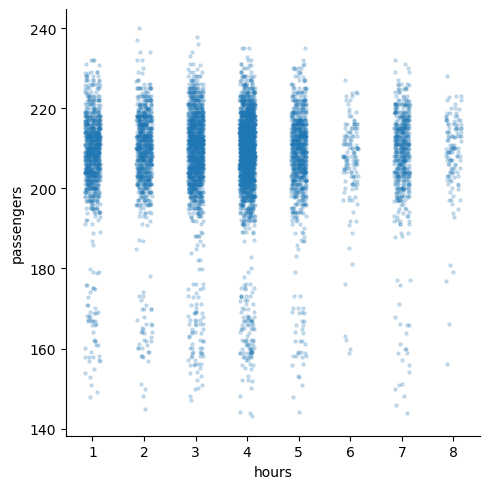

<Figure size 640x480 with 0 Axes>

In [245]:
## Task 6
flight_sub = flight.sample(n = int(flight.shape[0]*0.05))
sns.lmplot(x='hours', y='passengers', data=flight_sub, x_jitter = .15, y_jitter = .15, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

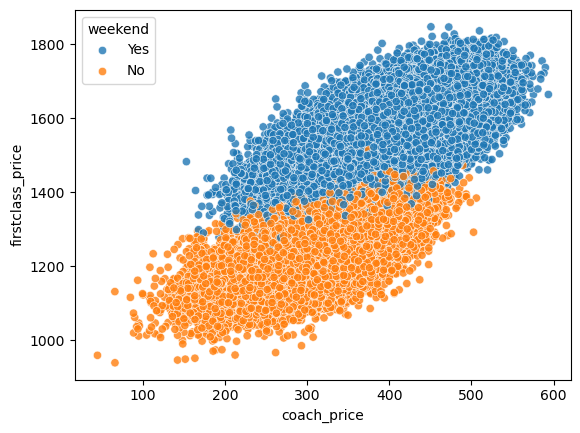

Prices for both coach and first class increase on the weekends


<Figure size 640x480 with 0 Axes>

In [255]:
## Task 7
sns.scatterplot(x = 'coach_price', y = 'firstclass_price', data=flight, hue = 'weekend', alpha=0.8)
plt.show()
plt.clf()
print('Prices for both coach and first class increase on the weekends')

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

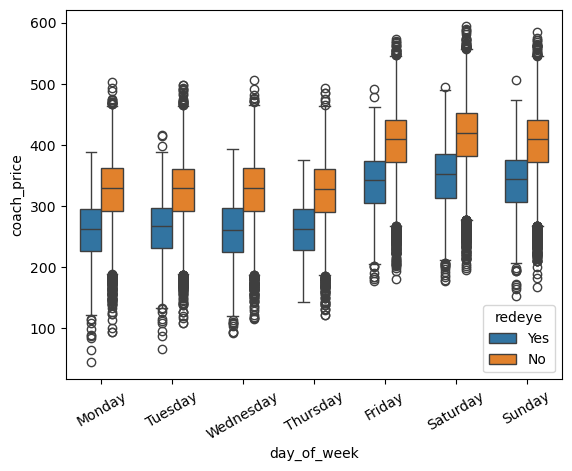

<Figure size 640x480 with 0 Axes>

In [279]:
## Task 8
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(x = 'day_of_week', y = 'coach_price', hue = 'redeye', data = flight, order=day_order, width=0.6)
plt.xticks(rotation=30)
plt.show()
plt.clf()



